# Exercise 1.7_Creating Network Visualizations
In this Notebook we have done the following 
1. Install the necessary libraries
2. Import the country relationship file (Relationship_count_NER) generated in Exercise 1.6
3. Create a Network object from the country relationship dataframe.
4. Create a Network graph using NetworkX
5. Create an interactive network graph using Pyvis
6. Apply the leiden algorithm to detect the communities.
7. Calculate the Degree, closeness and betweennesss centrality.

In [40]:
# Import the required libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [41]:
# Import relationship data

relationship_df = pd.read_csv('Relationship_count_NER.csv', index_col = 0)

In [42]:
relationship_df

,target,value
source,,
France,Russia,11
Germany,Russia,21
Germany,Yugoslavia,4
Czechoslovakia,Yugoslavia,12
Germany,Italy,21
...,...,...
Italy,Japan,6
Afghanistan,Africa,3
Romania,Russia,6


In [43]:
# Reset teh index , so as to remove Source from index and change it to a column name
relationship_df = relationship_df.reset_index()

In [44]:
relationship_df

,source,target,value
0,France,Russia,11
1,Germany,Russia,21
2,Germany,Yugoslavia,4
3,Czechoslovakia,Yugoslavia,12
4,Germany,Italy,21
...,...,...,...
103,Italy,Japan,6
104,Afghanistan,Africa,3
105,Romania,Russia,6
106,India,Lebanon,1


In [45]:
# Create the network object from the countries relationship dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = 'source', 
                            target = 'target', 
                            edge_attr = 'value', 
                            create_using = nx.Graph())

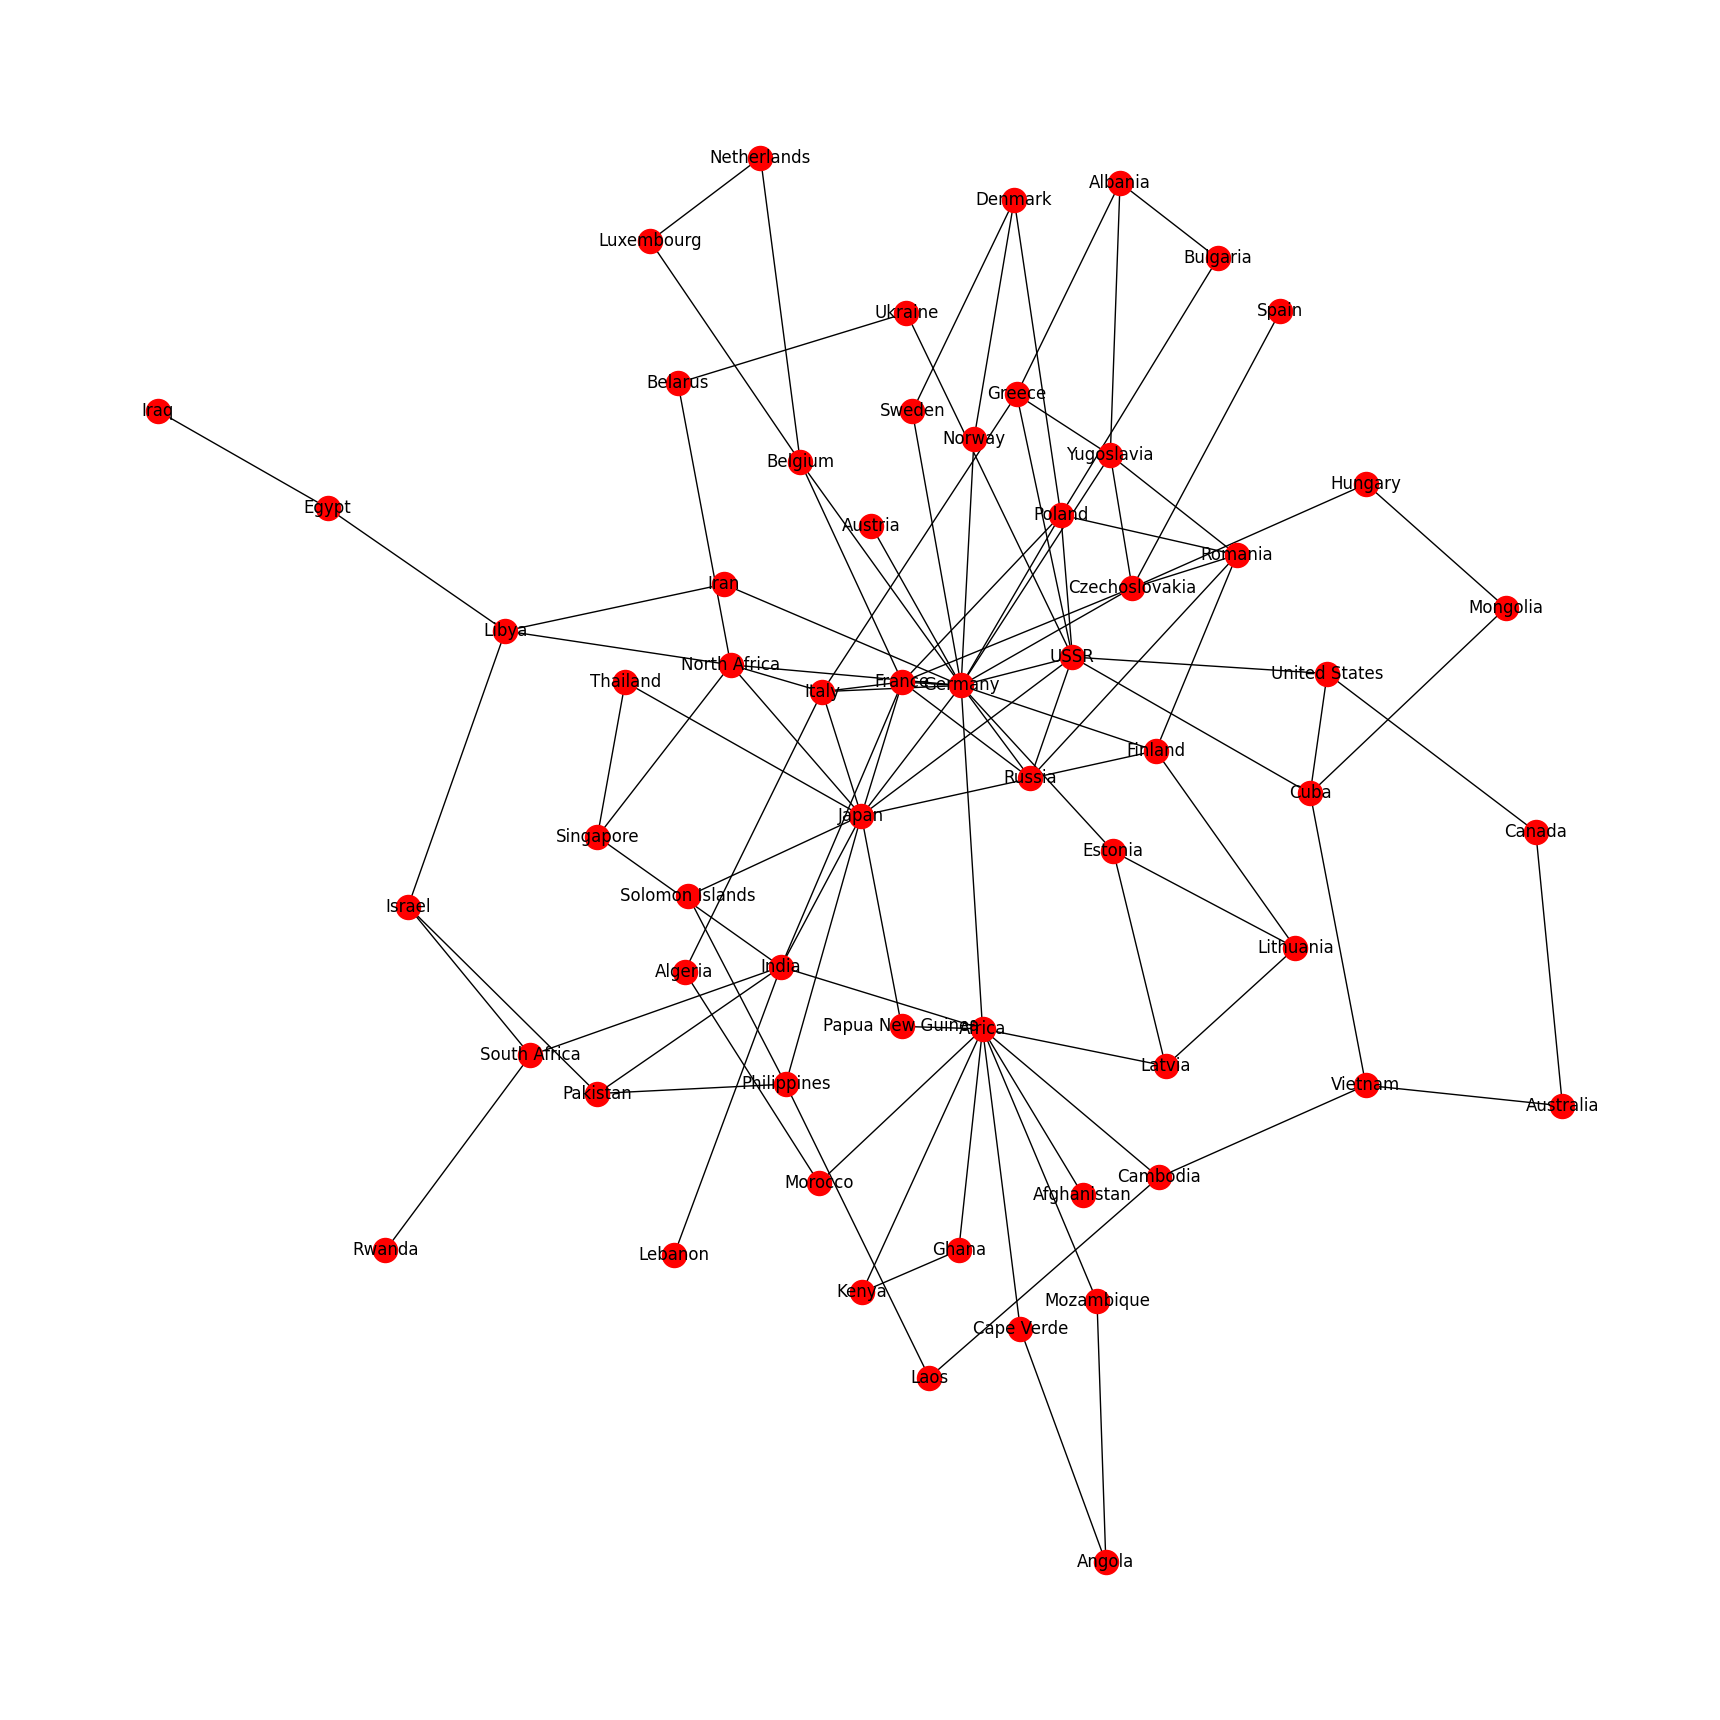

In [46]:
#Plot the graph using the Networkx plotting

h = plt.figure(figsize = (17,17))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [47]:
# save the graph
h.savefig(r"C:/Users/sorna/Desktop/Data Analysis/20th-century/networkx_plt_20th_Century.png")

In [48]:
# Create an interactive graph using the pyvis library
# Define net object
net = Network(
    notebook=True,
    width="900px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')

# Load graph into PyVis
net.from_nx(G)

# Change edge color to red + set font color for edge labels
for edge in net.edges:
    edge['color'] = 'red'        # edge color
    edge['font'] = {'color': 'white'}  # edge label font color

net.show_buttons(filter_=True)
net.repulsion()
net.show("Interactive_graph_20th century.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [10]:
# Apply leiden algorithm to detect the communities

from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'graph_tool', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'wurlitzer'}


ModuleNotFoundError: Optional dependency not satisfied: install igraph and leidenalg to use the selected feature.

In [49]:
pip install python-igraph leidenalg

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Apply leiden algorithm to detect the communities

from cdlib import algorithms
coms = algorithms.leiden(G)

In [51]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [52]:
# Convert the coms to more readable format
new_com = coms.to_node_community_map()

In [53]:
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Yugoslavia': [0],
             'Czechoslovakia': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Belgium': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Greece': [0],
             'Albania': [0],
             'Romania': [0],
             'Bulgaria': [0],
             'Africa': [1],
             'Morocco': [1],
             'Algeria': [1],
             'Papua New Guinea': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Cape Verde': [1],
             'Angola': [1],
             'Mozambique': [1],
             'Afghanistan': [1],
             'Libya': [2],
             'Egypt': [2],
        

In [54]:
# convert the output from new_com to a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [55]:
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Yugoslavia': 0,
 'Czechoslovakia': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Belgium': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Greece': 0,
 'Albania': 0,
 'Romania': 0,
 'Bulgaria': 0,
 'Africa': 1,
 'Morocco': 1,
 'Algeria': 1,
 'Papua New Guinea': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Kenya': 1,
 'Ghana': 1,
 'Cape Verde': 1,
 'Angola': 1,
 'Mozambique': 1,
 'Afghanistan': 1,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'India': 2,
 'Pakistan': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'Rwanda': 2,
 'Lebanon': 2,
 'USSR': 3,
 'Ukraine': 3,
 'Belarus': 3,
 'Hungary': 3,
 'Mongolia': 3,
 'Cuba': 3,
 'United States': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Italy': 4,
 'North Africa': 4,
 'Japan': 4,
 'Thailand': 4,
 'Singapore': 4,
 'Solomon Islands': 4,
 'Philippines': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5}

In [56]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Germany, Japan, France, Russia, Poland are the countries with the most number of edges, meaning they have the most number of relationship with the other countries and also involvement in the 20th Century major historical events.

In [57]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.13333333333333333,
 'Russia': 0.1,
 'Germany': 0.2833333333333333,
 'Yugoslavia': 0.08333333333333333,
 'Czechoslovakia': 0.1,
 'Italy': 0.1,
 'Austria': 0.016666666666666666,
 'Spain': 0.016666666666666666,
 'Poland': 0.1,
 'USSR': 0.13333333333333333,
 'Estonia': 0.05,
 'Latvia': 0.05,
 'Lithuania': 0.05,
 'Finland': 0.06666666666666667,
 'Denmark': 0.05,
 'Norway': 0.03333333333333333,
 'Sweden': 0.03333333333333333,
 'Belgium': 0.06666666666666667,
 'Netherlands': 0.03333333333333333,
 'Luxembourg': 0.03333333333333333,
 'Greece': 0.06666666666666667,
 'Albania': 0.05,
 'Ukraine': 0.03333333333333333,
 'Belarus': 0.03333333333333333,
 'North Africa': 0.1,
 'Libya': 0.06666666666666667,
 'Egypt': 0.03333333333333333,
 'Iraq': 0.016666666666666666,
 'Japan': 0.18333333333333332,
 'Africa': 0.18333333333333332,
 'Morocco': 0.03333333333333333,
 'Algeria': 0.03333333333333333,
 'Thailand': 0.03333333333333333,
 'Singapore': 0.05,
 'Solomon Islands': 0.03333333333333333,
 '

In [58]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['Countries','Centrality'])

In [59]:
degree_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)

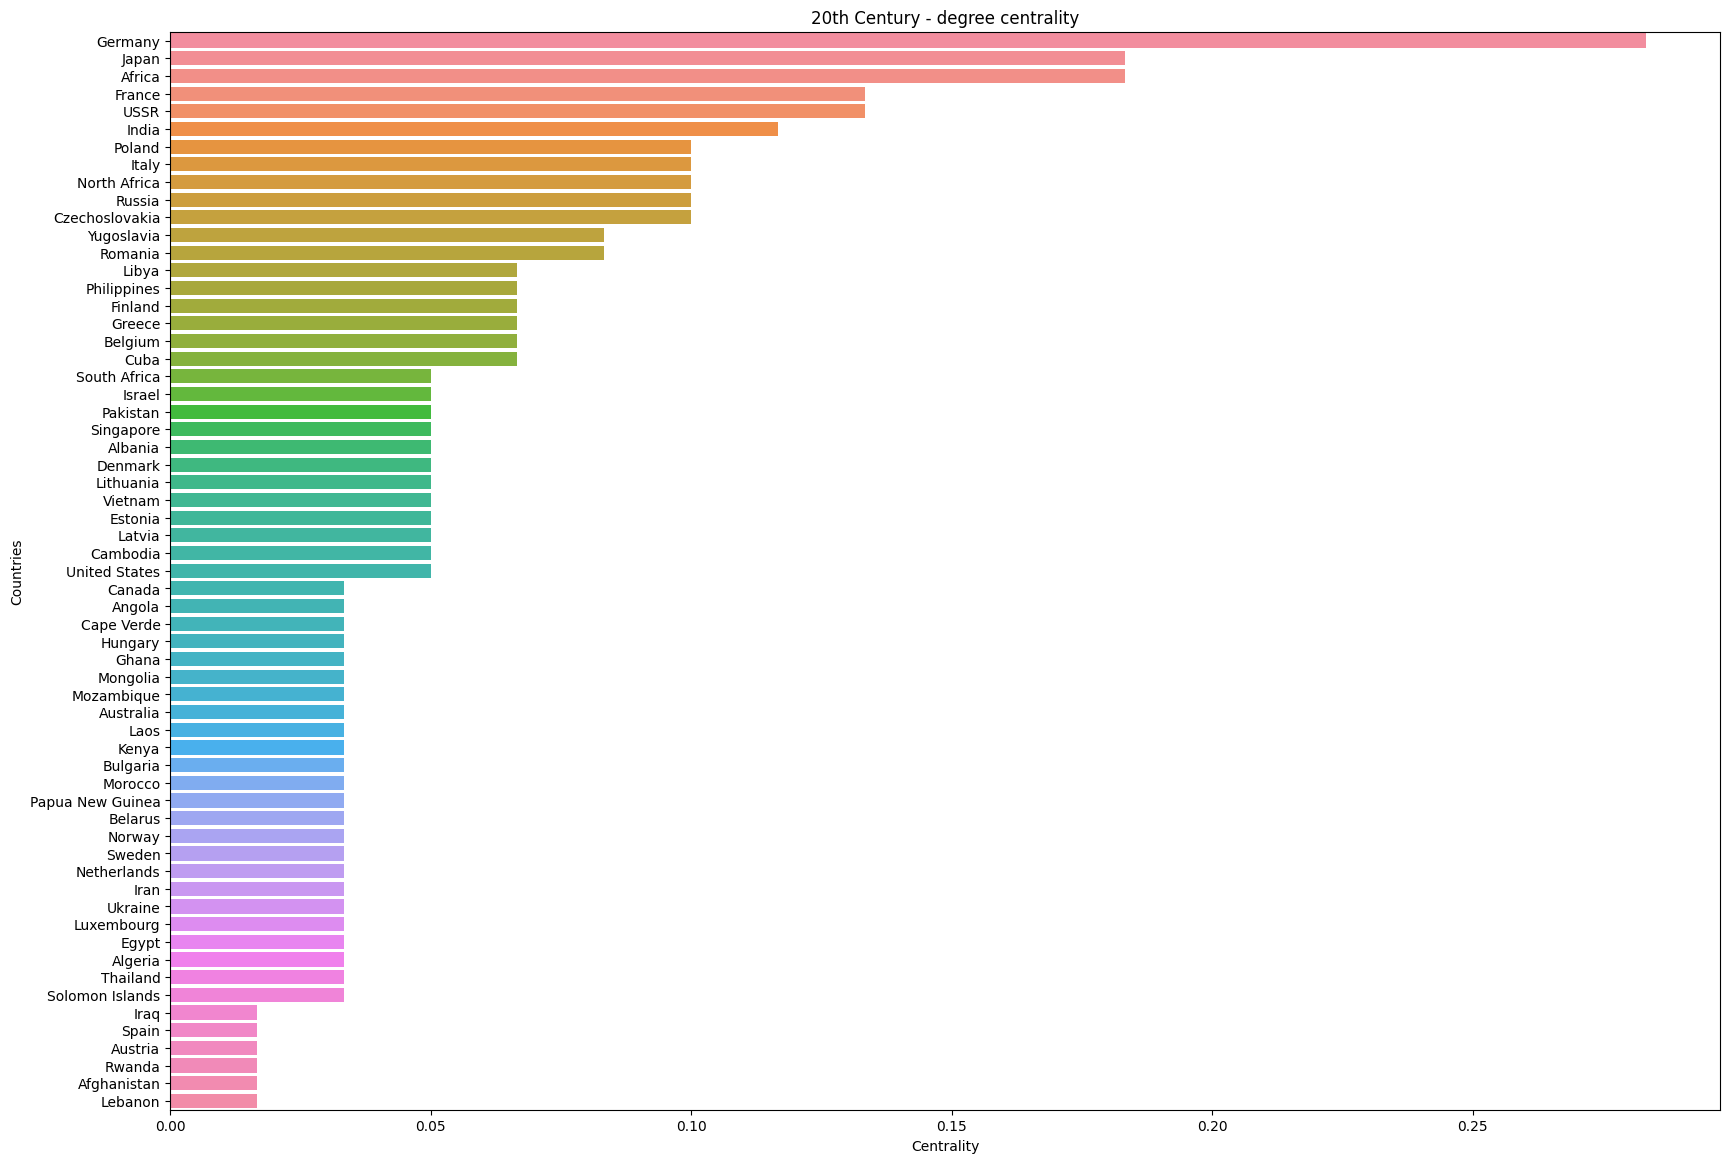

In [60]:
# Plot the degree centrality

plt.figure(figsize = (20, 14))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "Centrality", y = "Countries",
    saturation = 0.9, data = degree_df).set_title("20th Century - degree centrality")

# The above bar plot shows that Germany, Japan, Africa and France are the top 4 countries with the highest degree centrality, which means these countries have the highest number of connections with the other countries, which could also mean their active participation in the majors events of the 20th Century.

In [61]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['Countries','Centrality'])

In [62]:
closeness_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)

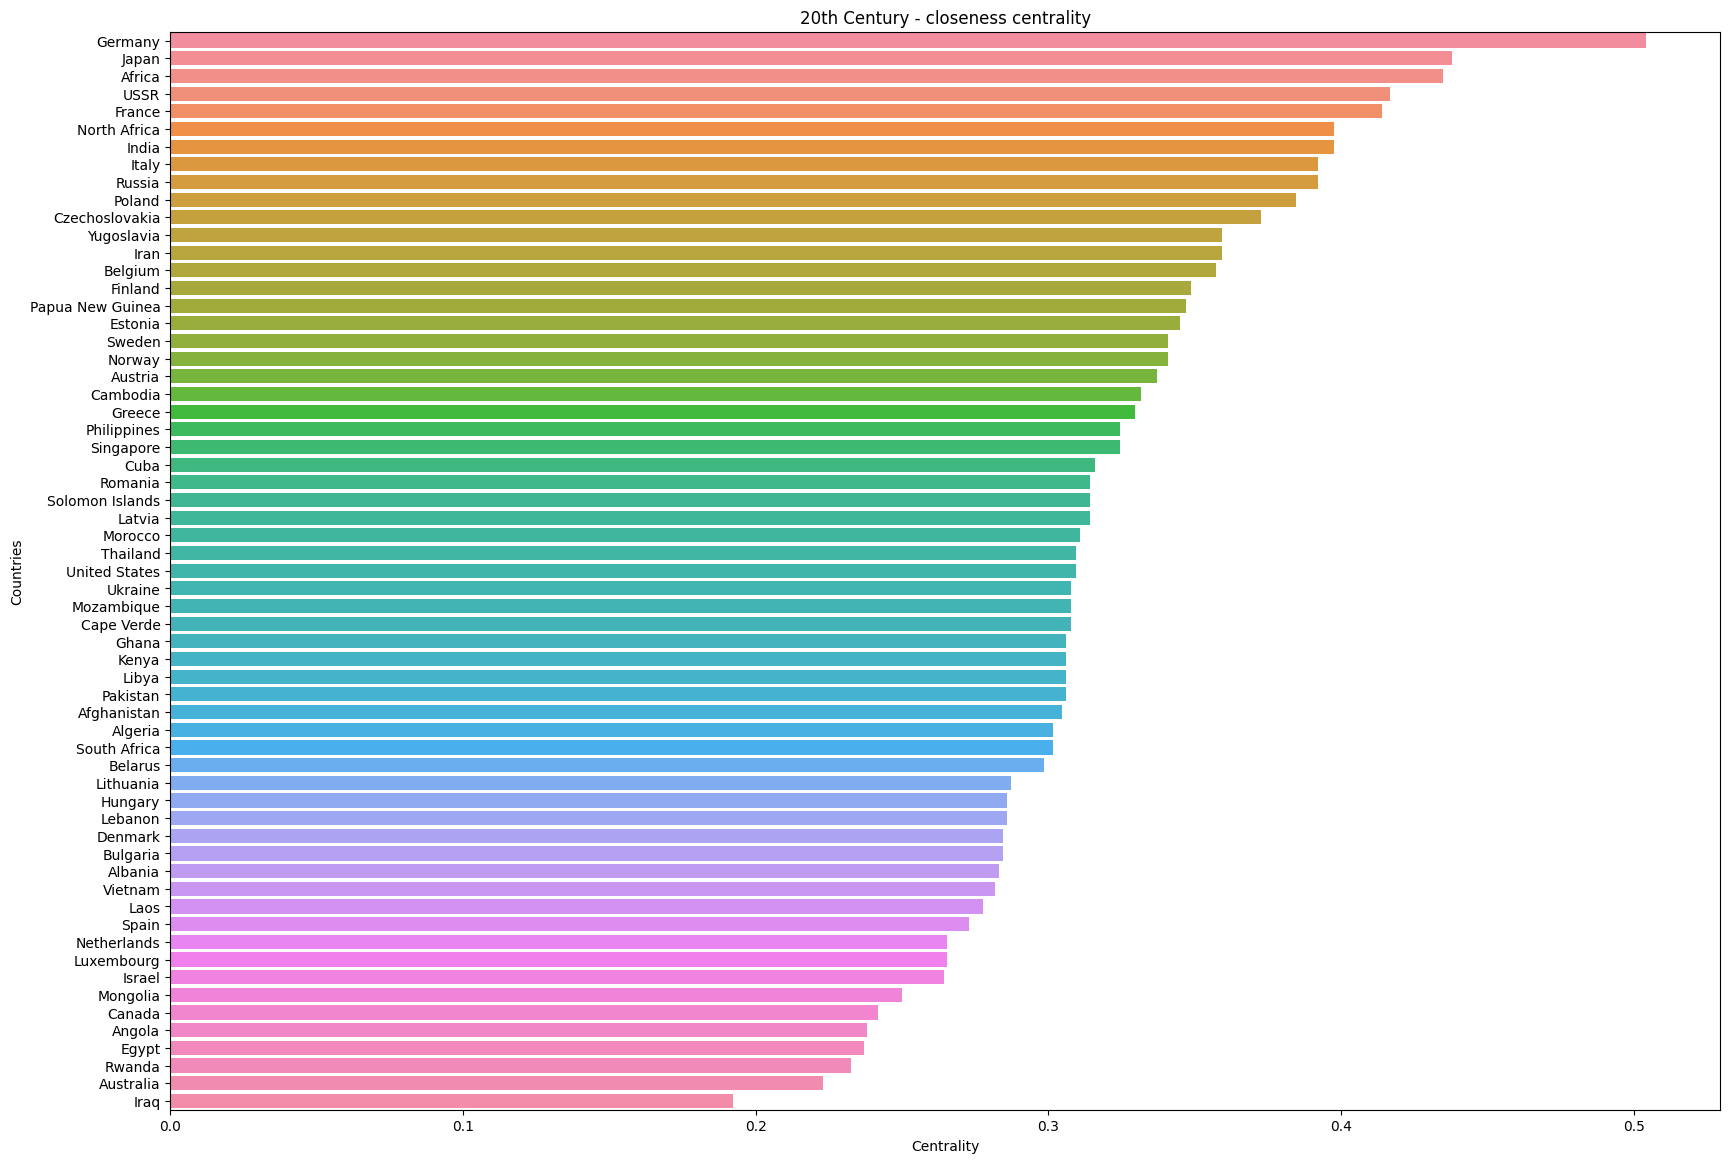

In [63]:
plt.figure(figsize = (20, 14))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "Centrality", y = "Countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century - closeness centrality")

# The above bar plot shows that Germany, Japan, Africa and USSR have the highest closeness centrality, which means they have the highest number of nodes close to them. Germany with the highest closeness centrality places it in the center of the graph, meaning it is close to the many other nodes in the graph.

In [64]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['Countries','Centrality'])

In [65]:
betweennes_df.sort_values(by = ['Centrality'], ascending=False, inplace = True)

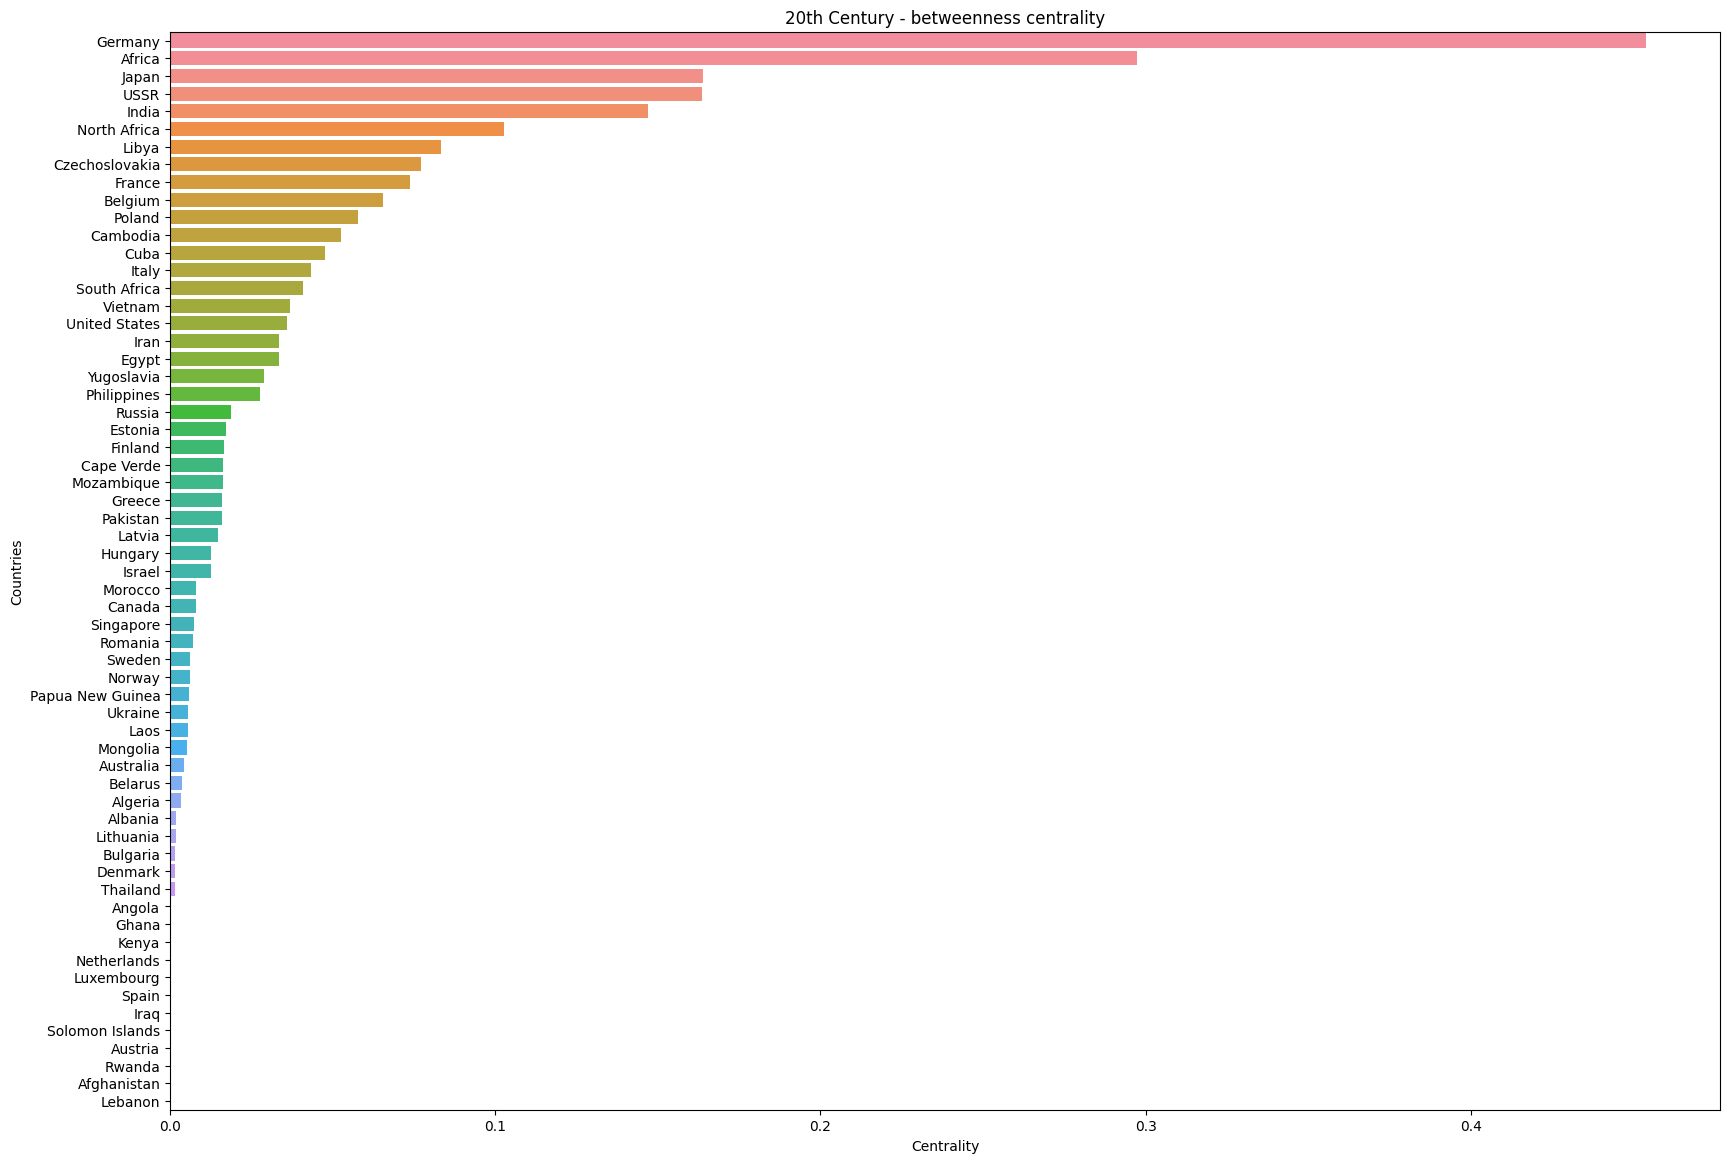

In [66]:
plt.figure(figsize = (20, 14))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "Centrality", y = "Countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

# the above bar plot shows that Germany, Japan, Africa, USSR and India have the highest betweenness centrality, which means these countries are connected to the many other countries with the shortest edges. This means these countries have an important and strong relationship with many other countries.

In [67]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [68]:
for node in net.nodes:
    node_id = node["id"]
    node["value"] = G.nodes[node_id]["degree_centrality"]  # size by centrality

In [69]:
from pyvis.network import Network

net = Network(
    notebook=True,
    width="900px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)

# Load graph
net.from_nx(G)

# Customize nodes based on centralities
for node in net.nodes:
    nid = node["id"]

    degree = G.nodes[nid]["degree_centrality"]
    betw = G.nodes[nid]["betweenness_centrality"]

    # Scale degree to control size
    node["value"] = degree * 100  

    # Map betweenness to color gradient
    if betw > 0.05:
        node["color"] = "red"
    elif betw > 0.02:
        node["color"] = "orange"
    else:
        node["color"] = "green"

net.show("centrality_graph.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [70]:
net = Network(notebook=True, width="900px", height="800px",
              bgcolor="#222222", font_color="white")

net.from_nx(G)

# Color nodes based on degree centrality
for node in net.nodes:
    nid = node["id"]
    dc = G.nodes[nid]["degree_centrality"]

    if dc > 0.10:
        node["color"] = "red"
    elif dc > 0.05:
        node["color"] = "orange"
    else:
        node["color"] = "green"

net.show("degree_colored.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
